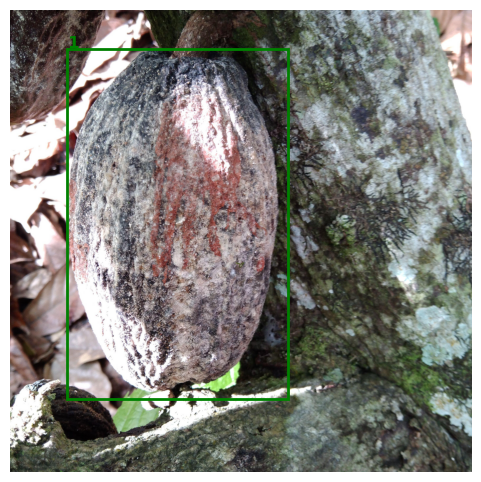

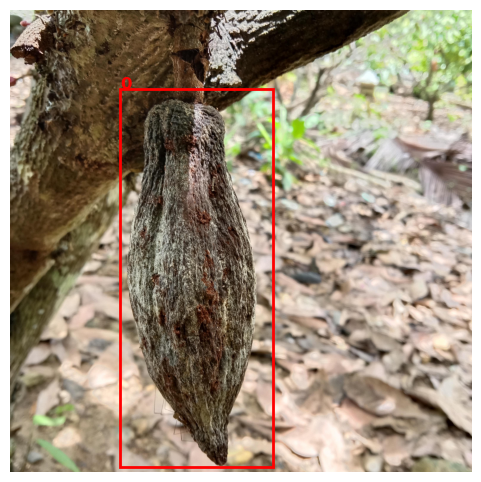

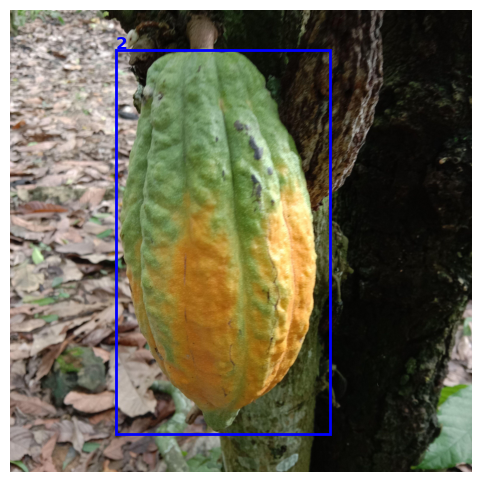

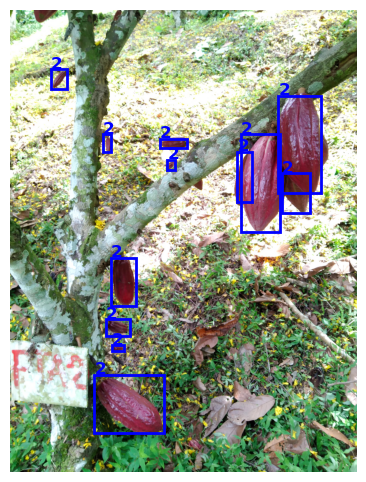

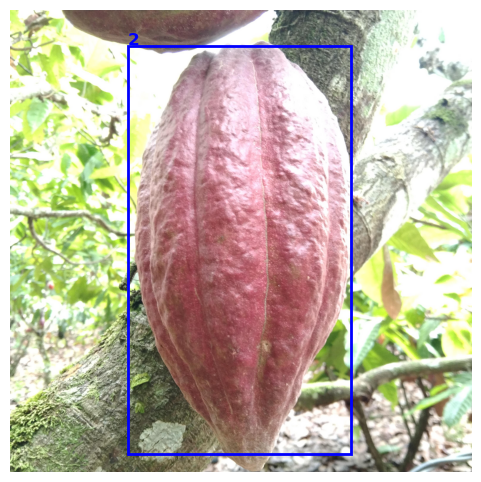

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Parámetros de configuración
root_dir = '../data/COCOA_DATASET_CLEAN'       
subset = 'train'        
num_images = 5       

# Rutas a carpetas de imágenes y labels
images_dir = os.path.join(root_dir, subset, 'images')
labels_dir = os.path.join(root_dir, subset, 'labels')

# Obtener lista de imágenes disponibles
all_images = [f for f in os.listdir(images_dir)
              if f.lower().endswith(('jpg', 'jpeg', 'png'))]
if not all_images:
    raise RuntimeError(f"No se encontraron imágenes en {images_dir}")

# Selección aleatoria
selected = random.sample(all_images, min(num_images, len(all_images)))

# Mapa de colores para cada clase
colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'yellow'
}

# Visualizar cada imagen con sus bounding boxes
for img_name in selected:
    img_path = os.path.join(images_dir, img_name)
    label_path = os.path.join(labels_dir, os.path.splitext(img_name)[0] + '.txt')

    # Cargar imagen
    img = Image.open(img_path)
    width, height = img.size

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)

    # Leer y dibujar labels si existen
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                cls_id, x_center, y_center, w_rel, h_rel = map(float, line.split())
                # Convertir coordenadas normalizadas a absolutas
                x = (x_center - w_rel / 2) * width
                y = (y_center - h_rel / 2) * height
                w = w_rel * width
                h = h_rel * height

                rect = patches.Rectangle(
                    (x, y), w, h,
                    linewidth=2,
                    edgecolor=colors.get(int(cls_id), 'white'),
                    facecolor='none'
                )
                ax.add_patch(rect)
                ax.text(x, y - 5, str(int(cls_id)),
                        color=colors.get(int(cls_id), 'white'),
                        fontsize=12, weight='bold')
    else:
        print(f"[WARNING] No se encontró label para {img_name}")

    ax.axis('off')
    plt.show()


In [ ]:
import os

def check_integrity(root_dir, subsets=('train','valid','test')):
    missing = []
    for s in subsets:
        img_dir = os.path.join(root_dir, s, 'images')
        lbl_dir = os.path.join(root_dir, s, 'labels')
        for img in os.listdir(img_dir):
            if not img.lower().endswith(('.jpg','.png','.jpeg')):
                continue
            lbl = img.rsplit('.',1)[0] + '.txt'
            if not os.path.exists(os.path.join(lbl_dir, lbl)):
                missing.append((s, img))
    if missing:
        print(f"¡Hay {len(missing)} imágenes sin label!\n")
        for s, img in missing:
            print(f"  – {s}/images/{img}")
    else:
        print("✔️  Todas las imágenes tienen su .txt")

check_integrity('../data/COCOA_DATASET_CLEAN')


✔️  Todas las imágenes tienen su .txt


In [ ]:
import os
from collections import Counter

def class_distribution(root_dir, subset='train'):
    lbl_dir = os.path.join(root_dir, subset, 'labels')
    counter = Counter()
    for fn in os.listdir(lbl_dir):
        with open(os.path.join(lbl_dir, fn)) as f:
            for line in f:
                cls_id = int(line.split()[0])
                counter[cls_id] += 1
    total_boxes = sum(counter.values())
    print(f"Subset {subset}: {total_boxes} boxes en total\n")
    for cls, cnt in counter.most_common():
        print(f"  Clase {cls}: {cnt} cajas ({cnt/total_boxes:.1%})")

for s in ('train','valid','test'):
    class_distribution('../data/COCOA_DATASET_CLEAN', s)
    print()


Subset train: 3748 boxes en total

  Clase 2: 1762 cajas (47.0%)
  Clase 0: 856 cajas (22.8%)
  Clase 3: 749 cajas (20.0%)
  Clase 1: 381 cajas (10.2%)

Subset valid: 968 boxes en total

  Clase 2: 416 cajas (43.0%)
  Clase 0: 262 cajas (27.1%)
  Clase 3: 197 cajas (20.4%)
  Clase 1: 93 cajas (9.6%)

Subset test: 686 boxes en total

  Clase 2: 349 cajas (50.9%)
  Clase 0: 162 cajas (23.6%)
  Clase 3: 121 cajas (17.6%)
  Clase 1: 54 cajas (7.9%)



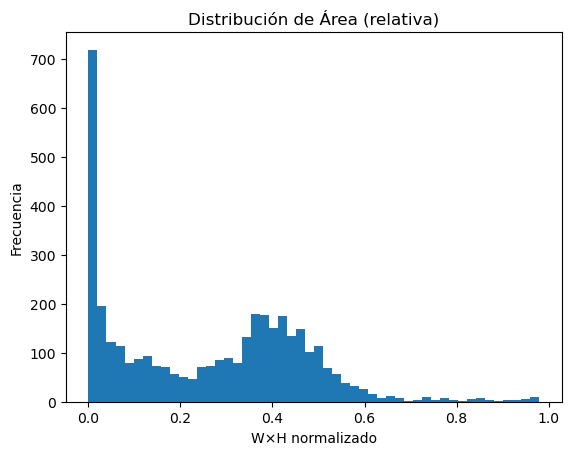

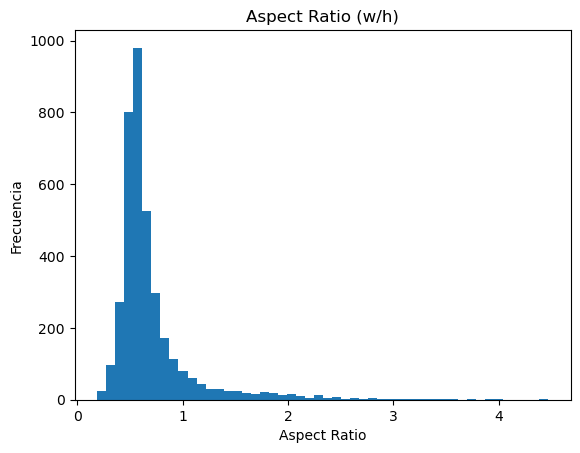

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_bboxes(lbl_dir):
    areas, ar = [], []
    for fn in os.listdir(lbl_dir):
        with open(os.path.join(lbl_dir, fn)) as f:
            for line in f:
                _, xc, yc, w, h = map(float, line.split())
                areas.append(w * h)
                ar.append(w/h if h>0 else 0)
    return np.array(areas), np.array(ar)

# Carga y plot
areas, ar = load_bboxes('/home/saur/Downloads/COCOA_DATASET_CLEAN/train/labels')

plt.figure()
plt.hist(areas, bins=50)
plt.title('Distribución de Área (relativa)')
plt.xlabel('W×H normalizado')
plt.ylabel('Frecuencia')
plt.show()

plt.figure()
plt.hist(ar, bins=50)
plt.title('Aspect Ratio (w/h)')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frecuencia')
plt.show()
